<a href="https://colab.research.google.com/github/Smjfirna/Customer_Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Get Data From Kaggle

In [ ]:
#Upload file kaggle agar bisa mengambil data tanpa download di local
from google.colab import files
files.upload()

In [2]:
#Download dataset dari kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vetrirah/customer

Dataset URL: https://www.kaggle.com/datasets/vetrirah/customer
License(s): CC0-1.0
100% 105k/105k [00:00<00:00, 337kB/s]
100% 105k/105k [00:00<00:00, 337kB/s]


In [3]:
#unzip data
!unzip -q customer.zip -d /content

# 2. Business Understanding

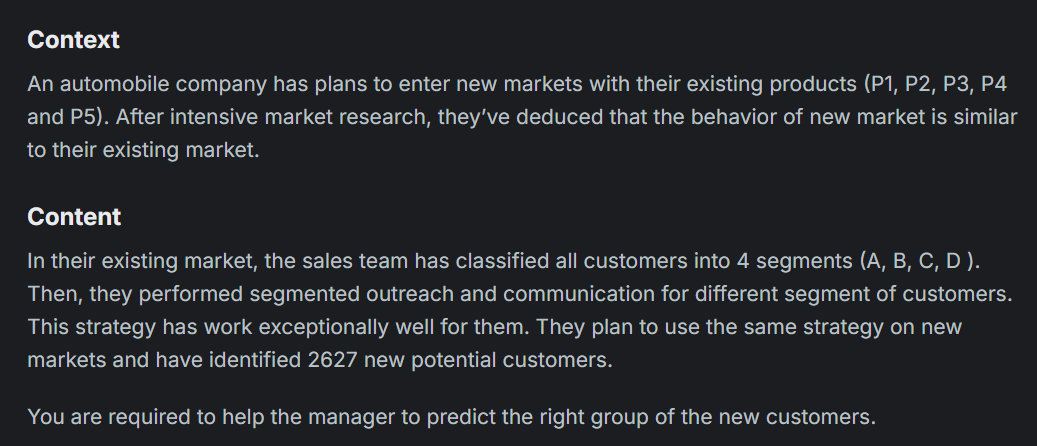

* whats the problem?

The company wants to solve the problem of entering the market for its new product that has the same customer segments as the old customer data, namely 4 segments (A, B, C, D).

* how we will work with the datasets?

the type of problem to be solved is a classification problem (supervised learning).


In [4]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 3. EDA

## Variable
* Unique ID : ID
* Gender : Gender of the customer.
* Ever_mariage : Marital status of the customer.
* Age : Age of the customer.
* Graduate : Is the customer a graduate ?
* Profession : Profession of the customer.
* Work Experience : Work Experience in years.
* Spending score : Spending score of the customer.
* Familiy_size : Number of family members for the customer (including the customer).
* Var_1 : Anonymised Category for the customer.

In [5]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
segment = pd.read_csv('sample_submission.csv')

In [6]:
train.tail(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


## Data Train

In [7]:
# 1. Menampilkan tipe data dari setiap kolom
print("Tipe Data dari Setiap Kolom:")
print(train.dtypes)

# 2. Mengelompokkan kolom berdasarkan tipe data float64
print("\n2 float64 Features")
float64_features = train.select_dtypes(include=['float64']).columns
print(float64_features)

# 3. Mengelompokkan kolom berdasarkan tipe data 'int64'
print("\n2 int64 Features")
int64_features = train.select_dtypes(include=['int64']).columns
print(int64_features)

# 4. Mengelompokkan kolom berdasarkan tipe data 'object' (kategorikal)
print("\n7 object Features")
object_features = train.select_dtypes(include=['object']).columns
print(object_features)

Tipe Data dari Setiap Kolom:
ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

2 float64 Features
Index(['Work_Experience', 'Family_Size'], dtype='object')

2 int64 Features
Index(['ID', 'Age'], dtype='object')

7 object Features
Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation'],
      dtype='object')


<ipython-input-8-bfb5fa5eef86>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="viridis")  # Menggunakan countplot untuk menghitung jumlah kategori
<ipython-input-8-bfb5fa5eef86>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="viridis")  # Menggunakan countplot untuk menghitung jumlah kategori
<ipython-input-8-bfb5fa5eef86>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="viridis")  # Menggunakan countplot untuk menghitung jumlah kategori
<ipython-inpu

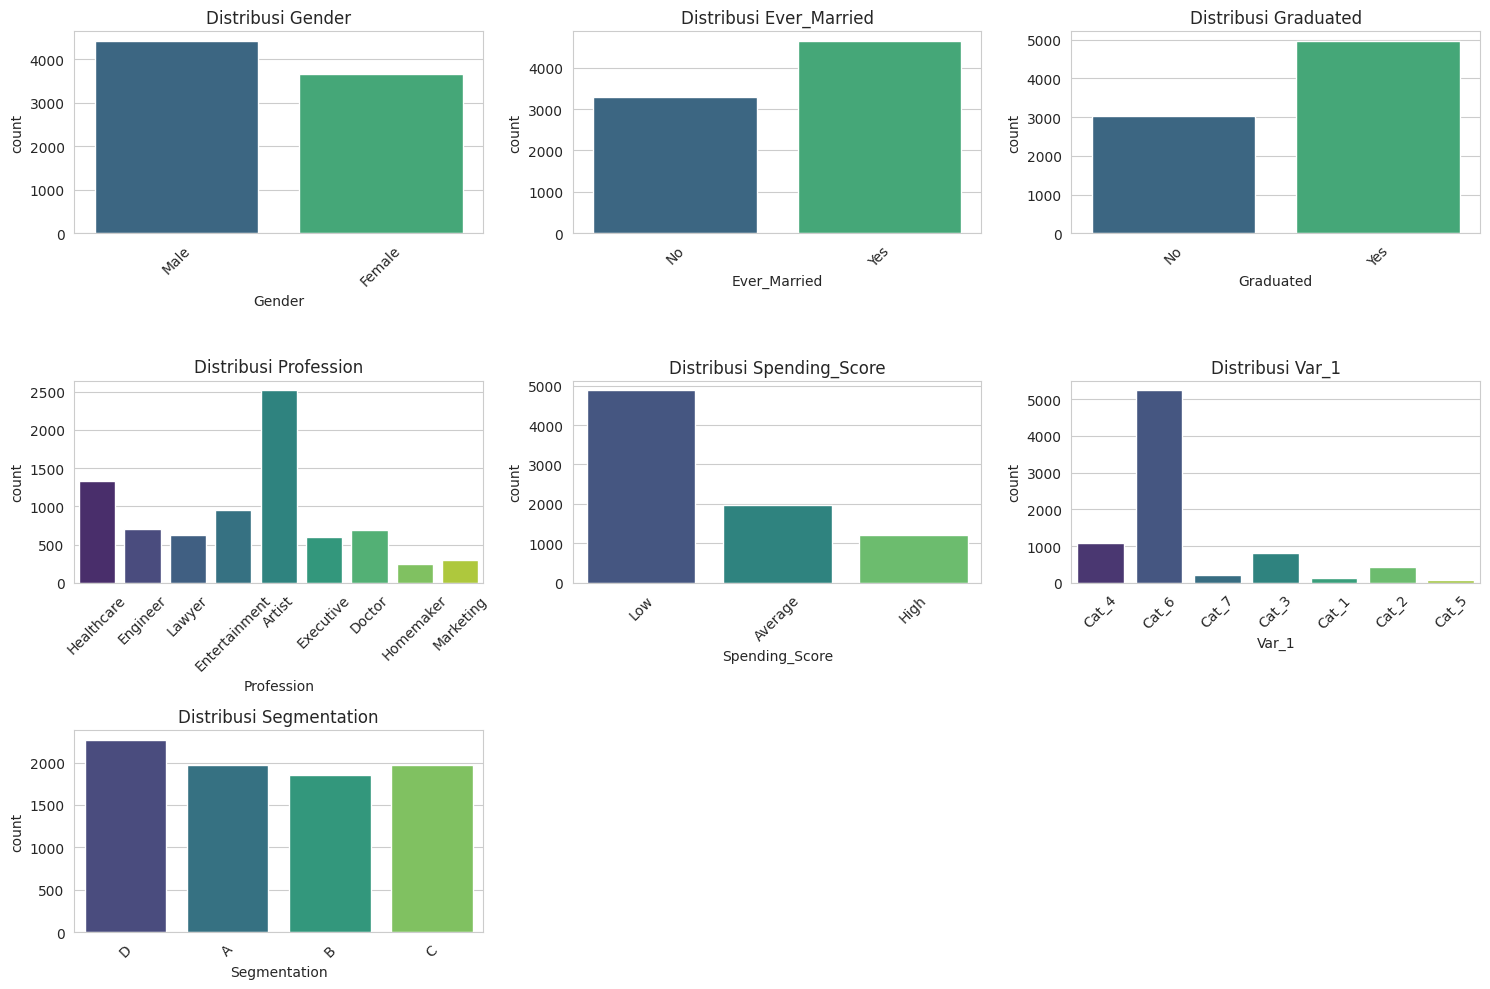

In [8]:
#Visualisasikan setiap variabel categorical untuk melihat nilai yang ada pada setiap variabel
categorical_variabel = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']

sns.set_style("whitegrid")

plt.figure(figsize=(15, 10))  # Menentukan ukuran figure
for i, col in enumerate(categorical_variabel, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=train, x=col, palette="viridis")  # Menggunakan countplot untuk menghitung jumlah kategori
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

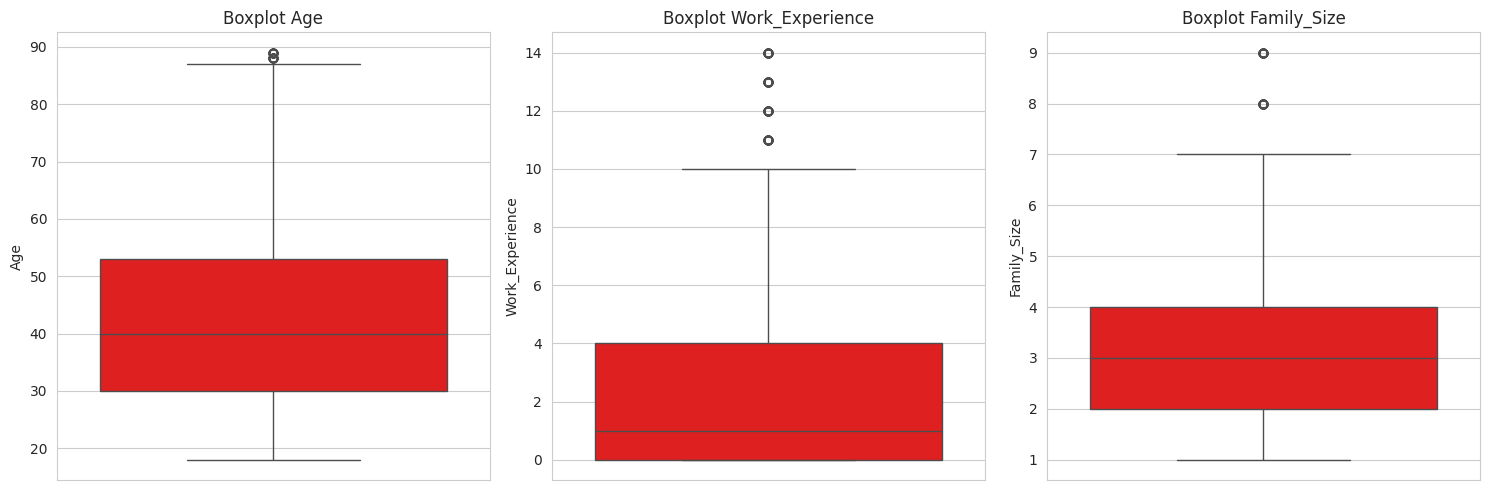

In [9]:
#Visualisasikan setiap variabel categorical untuk melihat nilai yang ada pada setiap variabel
numerical_variabel= ['Age', 'Work_Experience', 'Family_Size']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_variabel, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=train[col], color='red')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [10]:
train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [11]:
pd.set_option('display.max_rows', None)  # Menampilkan semua baris tanpa terpotong
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_colwidth', None)  # Menampilkan isi kolom panjang tanpa "..."
pd.set_option('display.expand_frame_repr', False)  # Agar tampilan tidak dipotong di jupyter notebook
def display_all_unique_with_duplicates(data):
    result = []

    for column in data.columns:
        unique_count = data[column].nunique()  # Jumlah nilai unik
        null_count = data[column].isnull().sum()  # Jumlah missing values
        value_counts = data[column].value_counts(dropna=False)  # Semua nilai unik + jumlahnya

        # Simpan dalam list untuk tabel
        result.append({
            'Column': column,
            'Unique Values Count': unique_count,
            'Missing Values': null_count,
            'All Unique Values (with count)': value_counts.to_dict()
        })

    # Konversi hasil ke DataFrame
    df_summary = pd.DataFrame(result)

    # Cek jumlah baris duplikat
    total_duplicates = data.duplicated().sum()
    duplicate_rows = data[data.duplicated()]  # Menampilkan baris duplikat

    print(f"\n🔍 Total Duplicate Rows: {total_duplicates}\n")

    if total_duplicates > 0:
        print("📋 Duplicate Rows Preview:")
        display(duplicate_rows.head(10))  # Tampilkan 10 baris pertama dari duplikat

    return df_summary

# Panggil fungsi untuk dataset "train"
display_all_unique_with_duplicates(train)


🔍 Total Duplicate Rows: 0



,Column,Unique Values Count,Missing Values,All Unique Values (with count)
0,ID,8068,0,"{462809: 1, 466223: 1, 464086: 1, 460372: 1, 460401: 1, 466767: 1, 467587: 1, 462421: 1, 463967: 1, 462185: 1, 461492: 1, 459106: 1, 464560: 1, 460641: 1, 464550: 1, 463351: 1, 463791: 1, 461074: 1, 463638: 1, 464114: 1, 462303: 1, 464708: 1, 464538: 1, 459931: 1, 465022: 1, 465346: 1, 462573: 1, 466614: 1, 460128: 1, 460110: 1, 464705: 1, 461514: 1, 466779: 1, 461882: 1, 459124: 1, 461203: 1, 463822: 1, 466916: 1, 460264: 1, 459426: 1, 467957: 1, 462589: 1, 467397: 1, 466981: 1, 462291: 1, 465997: 1, 467800: 1, 467552: 1, 464078: 1, 461939: 1, 461345: 1, 462909: 1, 464941: 1, 463201: 1, 466073: 1, 461047: 1, 460113: 1, 465700: 1, 461017: 1, 462923: 1, 460470: 1, 459251: 1, 461991: 1, 460288: 1, 467718: 1, 460809: 1, 461497: 1, 465800: 1, 459069: 1, 464052: 1, 460289: 1, 460073: 1, 464204: 1, 464479: 1, 464257: 1, 466167: 1, 459003: 1, 467138: 1, 465708: 1, 463919: 1, 465258: 1, 460850: 1, 467776: 1, 465525: 1, 467774: 1, 465648: 1, 463205: 1, 462802: 1, 466248: 1, 463448: 1, 465719: 1, 463299: 1, 463409: 1, 461046: 1, 464005: 1, 459588: 1, 464477: 1, 459476: 1, 466985: 1, 459686: 1, ...}"
1,Gender,2,0,"{'Male': 4417, 'Female': 3651}"
2,Ever_Married,2,140,"{'Yes': 4643, 'No': 3285, nan: 140}"
3,Age,67,0,"{35: 250, 37: 234, 33: 232, 42: 232, 40: 229, 27: 229, 43: 226, 38: 221, 32: 221, 28: 220, 25: 218, 31: 214, 36: 209, 39: 208, 41: 206, 26: 200, 30: 196, 29: 183, 50: 180, 47: 167, 51: 161, 46: 160, 45: 158, 53: 158, 52: 157, 49: 155, 48: 154, 22: 142, 19: 134, 18: 132, 23: 129, 20: 127, 21: 116, 56: 110, 55: 98, 59: 97, 60: 95, 57: 93, 61: 93, 62: 85, 58: 80, 63: 80, 66: 72, 65: 72, 70: 71, 68: 69, 72: 67, 69: 67, 67: 55, 73: 54, 71: 49, 81: 42, 82: 36, 89: 36, 88: 35, 83: 35, 79: 34, 84: 33, 75: 32, 77: 30, 86: 30, 74: 30, 78: 29, 87: 28, 76: 27, 80: 24, 85: 22}"
4,Graduated,2,78,"{'Yes': 4968, 'No': 3022, nan: 78}"
5,Profession,9,124,"{'Artist': 2516, 'Healthcare': 1332, 'Entertainment': 949, 'Engineer': 699, 'Doctor': 688, 'Lawyer': 623, 'Executive': 599, 'Marketing': 292, 'Homemaker': 246, nan: 124}"
6,Work_Experience,15,829,"{1.0: 2354, 0.0: 2318, nan: 829, 9.0: 474, 8.0: 463, 2.0: 286, 3.0: 255, 4.0: 253, 6.0: 204, 7.0: 196, 5.0: 194, 10.0: 53, 11.0: 50, 12.0: 48, 13.0: 46, 14.0: 45}"
7,Spending_Score,3,0,"{'Low': 4878, 'Average': 1974, 'High': 1216}"
8,Family_Size,9,335,"{2.0: 2390, 3.0: 1497, 1.0: 1453, 4.0: 1379, 5.0: 612, nan: 335, 6.0: 212, 7.0: 96, 8.0: 50, 9.0: 44}"
9,Var_1,7,76,"{'Cat_6': 5238, 'Cat_4': 1089, 'Cat_3': 822, 'Cat_2': 422, 'Cat_7': 203, 'Cat_1': 133, 'Cat_5': 85, nan: 76}"


## Data Test

In [12]:
# 1. Menampilkan tipe data dari setiap kolom
print("Tipe Data dari Setiap Kolom:")
print(test.dtypes)

# 2. Mengelompokkan kolom berdasarkan tipe data float64
print("\n2 float64 Features")
float64_features = test.select_dtypes(include=['float64']).columns
print(float64_features)

# 3. Mengelompokkan kolom berdasarkan tipe data 'int64'
print("\n2 int64 Features")
int64_features = test.select_dtypes(include=['int64']).columns
print(int64_features)

# 4. Mengelompokkan kolom berdasarkan tipe data 'object' (kategorikal)
print("\n6 object Features")
object_features = test.select_dtypes(include=['object']).columns
print(object_features)

Tipe Data dari Setiap Kolom:
ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object

2 float64 Features
Index(['Work_Experience', 'Family_Size'], dtype='object')

2 int64 Features
Index(['ID', 'Age'], dtype='object')

6 object Features
Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'],
      dtype='object')


<ipython-input-13-be21861e7cfc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="viridis")  # Menggunakan countplot untuk menghitung jumlah kategori
<ipython-input-13-be21861e7cfc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="viridis")  # Menggunakan countplot untuk menghitung jumlah kategori
<ipython-input-13-be21861e7cfc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="viridis")  # Menggunakan countplot untuk menghitung jumlah kategori
<ipython-inpu

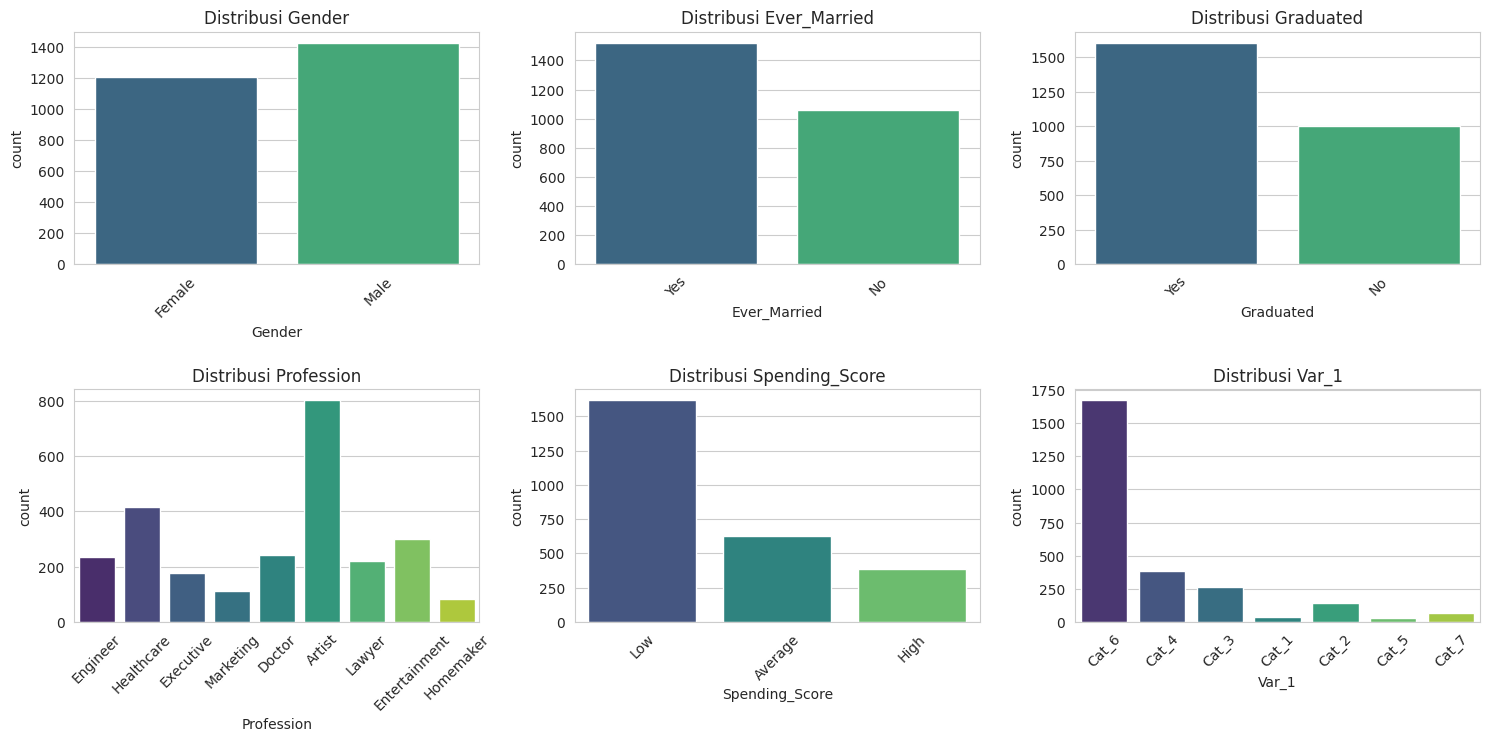

In [13]:
#Visualisasikan setiap variabel categorical untuk melihat nilai yang ada pada setiap variabel
categorical_variabel = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

sns.set_style("whitegrid")

plt.figure(figsize=(15, 10))  # Menentukan ukuran figure
for i, col in enumerate(categorical_variabel, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=test, x=col, palette="viridis")  # Menggunakan countplot untuk menghitung jumlah kategori
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

In [14]:
test.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


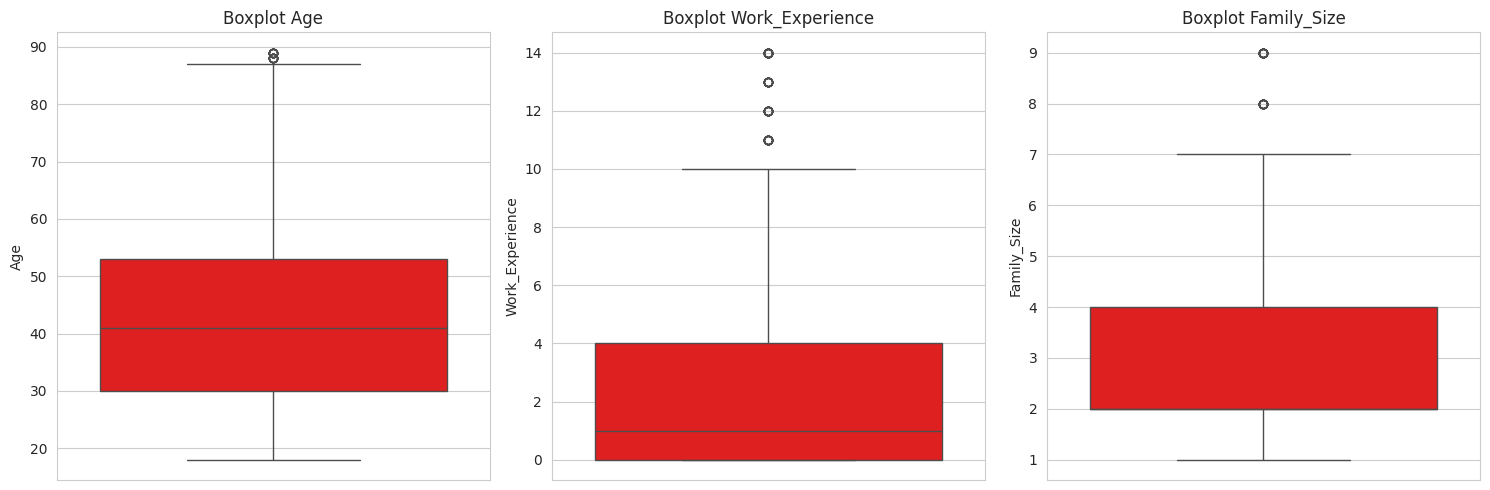

In [15]:
#Visualisasikan setiap variabel categorical untuk melihat nilai yang ada pada setiap variabel
numerical_variabel= ['Age', 'Work_Experience', 'Family_Size']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_variabel, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=test[col], color='red')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [16]:
pd.set_option('display.max_rows', None)  # Menampilkan semua tanpa terpotong
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

def display_all_unique_with_duplicates(data):
    result = []

    for column in data.columns:
        unique_count = data[column].nunique()  # Jumlah nilai unik
        null_count = data[column].isnull().sum()  # Jumlah missing values
        value_counts = data[column].value_counts(dropna=False)  # Semua nilai unik + jumlahnya

        # Simpan dalam list untuk tabel
        result.append({
            'Column': column,
            'Unique Values Count': unique_count,
            'Missing Values': null_count,
            'All Unique Values (with count)': value_counts.to_dict()
        })

    # Konversi hasil ke DataFrame
    df_summary = pd.DataFrame(result)

    # Cek jumlah baris duplikat
    total_duplicates = data.duplicated().sum()
    duplicate_rows = data[data.duplicated()]  # Menampilkan baris duplikat

    print(f"\n🔍 Total Duplicate Rows: {total_duplicates}\n")

    if total_duplicates > 0:
        print("📋 Duplicate Rows Preview:")
        display(duplicate_rows.head(10))  # Tampilkan 10 baris pertama dari duplikat

    return df_summary

# Panggil fungsi untuk dataset "train"
display_all_unique_with_duplicates(test)


🔍 Total Duplicate Rows: 0



,Column,Unique Values Count,Missing Values,All Unique Values (with count)
0,ID,2627,0,"{458989: 1, 464925: 1, 464932: 1, 464938: 1, 464939: 1, 464940: 1, 464944: 1, 464947: 1, 464957: 1, 464960: 1, 464961: 1, 464963: 1, 464972: 1, 464973: 1, 464981: 1, 464987: 1, 464990: 1, 464991: 1, 464995: 1, 464927: 1, 464921: 1, 465697: 1, 464920: 1, 464865: 1, 464868: 1, 464872: 1, 464873: 1, 464876: 1, 464879: 1, 464884: 1, 464885: 1, 464886: 1, 464902: 1, 464905: 1, 464907: 1, 464910: 1, 464911: 1, 464915: 1, 464916: 1, 464919: 1, 465001: 1, 465005: 1, 465012: 1, 465014: 1, 465099: 1, 465100: 1, 465101: 1, 465105: 1, 465109: 1, 465111: 1, 465112: 1, 465113: 1, 465119: 1, 465120: 1, 465121: 1, 465122: 1, 465124: 1, 465128: 1, 465134: 1, 465136: 1, 465144: 1, 465095: 1, 465093: 1, 465092: 1, 465040: 1, 465022: 1, 465023: 1, 465026: 1, 465032: 1, 465035: 1, 465038: 1, 465039: 1, 465045: 1, 465091: 1, 465056: 1, 465069: 1, 465075: 1, 465076: 1, 465079: 1, 465082: 1, 465087: 1, 464864: 1, 464861: 1, 464857: 1, 464726: 1, 464683: 1, 464684: 1, 464685: 1, 464688: 1, 464690: 1, 464691: 1, 464692: 1, 464693: 1, 464695: 1, 464696: 1, 464697: 1, 464699: 1, 464701: 1, 464704: 1, 464707: 1, ...}"
1,Gender,2,0,"{'Male': 1424, 'Female': 1203}"
2,Ever_Married,2,50,"{'Yes': 1520, 'No': 1057, nan: 50}"
3,Age,67,0,"{42: 88, 28: 77, 30: 76, 41: 76, 43: 75, 46: 73, 39: 72, 40: 71, 35: 71, 25: 70, 37: 70, 36: 68, 26: 68, 38: 67, 33: 66, 32: 66, 27: 66, 31: 61, 29: 61, 48: 59, 50: 54, 49: 53, 51: 53, 52: 51, 20: 51, 19: 50, 47: 50, 45: 47, 18: 42, 22: 42, 53: 41, 21: 37, 23: 35, 61: 33, 62: 31, 59: 31, 63: 30, 60: 30, 56: 28, 57: 27, 71: 27, 73: 26, 69: 25, 55: 25, 67: 23, 65: 23, 58: 23, 66: 19, 83: 18, 86: 17, 68: 17, 87: 16, 72: 15, 79: 15, 70: 14, 74: 12, 84: 11, 85: 10, 89: 10, 76: 9, 80: 9, 77: 9, 82: 9, 88: 9, 81: 7, 78: 7, 75: 5}"
4,Graduated,2,24,"{'Yes': 1602, 'No': 1001, nan: 24}"
5,Profession,9,38,"{'Artist': 802, 'Healthcare': 418, 'Entertainment': 301, 'Doctor': 242, 'Engineer': 236, 'Lawyer': 221, 'Executive': 176, 'Marketing': 111, 'Homemaker': 82, nan: 38}"
6,Work_Experience,15,269,"{1.0: 773, 0.0: 769, nan: 269, 8.0: 149, 9.0: 139, 4.0: 93, 2.0: 87, 3.0: 82, 5.0: 76, 6.0: 61, 7.0: 60, 14.0: 21, 11.0: 14, 12.0: 12, 13.0: 11, 10.0: 11}"
7,Spending_Score,3,0,"{'Low': 1616, 'Average': 625, 'High': 386}"
8,Family_Size,9,113,"{2.0: 768, 1.0: 512, 3.0: 455, 4.0: 444, 5.0: 200, nan: 113, 6.0: 78, 7.0: 26, 9.0: 16, 8.0: 15}"
9,Var_1,7,32,"{'Cat_6': 1672, 'Cat_4': 386, 'Cat_3': 267, 'Cat_2': 141, 'Cat_7': 66, 'Cat_1': 34, nan: 32, 'Cat_5': 29}"


## Kesimpulan EDA
1. Banyak Missing Value di setiap  variabel terutama pada data train
2. Terdapat outlier di variabel numerik


# 4. Cleaning Data

In [17]:
#handle missing value
#cek berapa persen missing datanya
missing_percentage = (train.isna().sum() / len(train)) * 100
print(missing_percentage)

ID                  0.000000
Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64


In [18]:
missing_percentage = (test.isna().sum() / len(test)) * 100
print(missing_percentage)

ID                  0.000000
Gender              0.000000
Ever_Married        1.903312
Age                 0.000000
Graduated           0.913590
Profession          1.446517
Work_Experience    10.239817
Spending_Score      0.000000
Family_Size         4.301485
Var_1               1.218120
dtype: float64


Missing data is very large so data is impossible to delete

## Outlier Handling

### Train

In [19]:
Q1 = train[['Age', 'Work_Experience', 'Family_Size']].quantile(0.25)
Q3 = train[['Age', 'Work_Experience', 'Family_Size']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((train[['Age', 'Work_Experience', 'Family_Size']] < (Q1 - 1.5 * IQR)) |
            (train[['Age', 'Work_Experience', 'Family_Size']] > (Q3 + 1.5 * IQR))).sum()

print("Jumlah outlier di setiap variabel:")
print(outliers)

Jumlah outlier di setiap variabel:
Age                 71
Work_Experience    189
Family_Size         94
dtype: int64


In [20]:
#fungsi untuk menampilkan baris data yang tergolong outlier
def detect_outliers_iqr(df):
    """Menampilkan baris yang mengandung outlier berdasarkan metode IQR."""
    outlier_rows = pd.DataFrame()  # DataFrame kosong untuk menyimpan outlier

    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR  # Batas bawah
        upper_bound = Q3 + 1.5 * IQR  # Batas atas

        # Ambil baris yang memiliki outlier di kolom tertentu
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Gabungkan hasilnya ke dalam satu DataFrame (hindari duplikasi index)
        outlier_rows = pd.concat([outlier_rows, outliers]).drop_duplicates()

    return outlier_rows

# Jalankan fungsi untuk menampilkan baris yang memiliki outlier
outlier_rows = detect_outliers_iqr(train)

# Menampilkan jumlah outlier dan data outliernya
print(f"Total Baris Mengandung Outlier: {outlier_rows.shape[0]}")
display(outlier_rows)  # Menampilkan dataframe outlier

Total Baris Mengandung Outlier: 348


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
321,467714,Male,Yes,89,Yes,Lawyer,13.0,Low,1.0,Cat_6,A
395,462149,Female,Yes,89,No,Lawyer,3.0,High,1.0,Cat_6,D
699,465264,Male,Yes,88,No,Executive,0.0,Low,1.0,Cat_6,A
753,464258,Female,Yes,88,No,Lawyer,0.0,High,2.0,Cat_6,B
943,459453,Male,Yes,88,Yes,Lawyer,NaN,Low,NaN,Cat_6,B
1108,467952,Female,Yes,89,Yes,Lawyer,0.0,High,2.0,Cat_6,C
1179,465101,Female,Yes,88,Yes,Lawyer,1.0,Low,1.0,Cat_6,D
1213,467551,Female,Yes,89,No,Lawyer,0.0,High,2.0,Cat_6,B
1330,467213,Female,Yes,88,Yes,Lawyer,1.0,High,2.0,Cat_6,B
1610,463536,Male,Yes,89,Yes,Executive,NaN,High,2.0,Cat_6,C


from the outlier check found some data that does not make sense, for example like this:

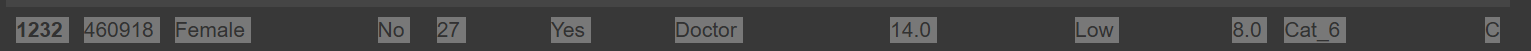

image.png

image.png



In [21]:
# Menghapus data dengan aturan tambahan:
train_clean = train[~((train['Profession'] == 'Doctor') & (train['Age'] < 30) & (train['Work_Experience'] > 5))]
train_clean = train_clean[~((train['Profession'] == 'Engineer') & (train['Age'] < 25) & (train['Work_Experience'] > 5))]

# Menyimpan data yang sudah dibersihkan ke dalam file baru
train_clean.to_csv("data_train_cleaned.csv", index=False)

# Menampilkan jumlah data setelah pembersihan
print(f"Jumlah Data Setelah Pembersihan: {train_clean.shape[0]}")

Jumlah Data Setelah Pembersihan: 8024


<ipython-input-21-d0b4ae8cf1f5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_clean = train_clean[~((train['Profession'] == 'Engineer') & (train['Age'] < 25) & (train['Work_Experience'] > 5))]


### Test

In [22]:
Q1 = test[['Age', 'Work_Experience', 'Family_Size']].quantile(0.25)
Q3 = test[['Age', 'Work_Experience', 'Family_Size']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((test[['Age', 'Work_Experience', 'Family_Size']] < (Q1 - 1.5 * IQR)) |
            (test[['Age', 'Work_Experience', 'Family_Size']] > (Q3 + 1.5 * IQR))).sum()

print("Jumlah outlier di setiap variabel:")
print(outliers)

Jumlah outlier di setiap variabel:
Age                19
Work_Experience    58
Family_Size        31
dtype: int64


In [23]:
def detect_outliers_iqr(df):
    """Menampilkan baris yang mengandung outlier berdasarkan metode IQR."""
    outlier_rows = pd.DataFrame()  # DataFrame kosong untuk menyimpan outlier

    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)  # Kuartil 1
        Q3 = df[col].quantile(0.75)  # Kuartil 3
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR  # Batas bawah
        upper_bound = Q3 + 1.5 * IQR  # Batas atas

        # Ambil baris yang memiliki outlier di kolom tertentu
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Gabungkan hasilnya ke dalam satu DataFrame (hindari duplikasi index)
        outlier_rows = pd.concat([outlier_rows, outliers]).drop_duplicates()

    return outlier_rows

# Jalankan fungsi untuk menampilkan baris yang memiliki outlier
outlier_rows = detect_outliers_iqr(test)

# Menampilkan jumlah outlier dan data outliernya
print(f"Total Baris Mengandung Outlier: {outlier_rows.shape[0]}")
display(outlier_rows)  # Menampilkan dataframe outlier

Total Baris Mengandung Outlier: 107


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
19,459045,Female,Yes,88,Yes,Lawyer,1.0,Average,4.0,Cat_6
30,459080,Male,Yes,89,No,Lawyer,1.0,Low,2.0,Cat_6
67,459194,Female,Yes,89,Yes,Lawyer,0.0,High,2.0,Cat_6
109,459344,Female,Yes,88,Yes,Artist,1.0,High,2.0,Cat_6
137,459410,Female,Yes,88,Yes,Lawyer,1.0,High,2.0,Cat_6
191,459576,Female,Yes,88,No,Lawyer,NaN,Low,NaN,NaN
218,459665,Male,Yes,88,Yes,Artist,4.0,Low,2.0,Cat_6
390,460272,Female,No,88,Yes,Lawyer,0.0,Low,1.0,Cat_6
452,460447,Male,NaN,89,No,Lawyer,0.0,Low,1.0,Cat_3
476,460542,Female,Yes,89,No,Lawyer,1.0,Low,NaN,Cat_3


In [24]:
# Menghapus data dengan aturan tambahan:
test_clean = test[~((test['Profession'] == 'Doctor') & (test['Age'] < 30) & (test['Work_Experience'] > 5))]
test_clean = test_clean[~((test['Profession'] == 'Engineer') & (test['Age'] < 25) & (test['Work_Experience'] > 5))]

# Menyimpan data yang sudah dibersihkan ke dalam file baru
test_clean.to_csv("data_test_cleaned.csv", index=False)

# Menampilkan jumlah data setelah pembersihan
print(f"Jumlah Data Setelah Pembersihan: {test_clean.shape[0]}")

Jumlah Data Setelah Pembersihan: 2610


<ipython-input-24-7c9c7a75fa2d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_clean = test_clean[~((test['Profession'] == 'Engineer') & (test['Age'] < 25) & (test['Work_Experience'] > 5))]


New data without outliers

In [25]:
train_data = pd.read_csv('data_train_cleaned.csv')

In [26]:
test_data = pd.read_csv('data_test_cleaned.csv')

## Missing Value Handling

Because the missing data is too much and the missing values are still included, it will be filled with other values because it is not special information. then the method used is to use the median method on numerical data and mode on categorical data.

### Train

In [27]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Work_Experience'].fillna(train_data['Work_Experience'].median(), inplace=True)
train_data['Family_Size'].fillna(train_data['Family_Size'].median(), inplace=True)

<ipython-input-27-5df96da6a560>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-27-5df96da6a560>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [28]:
train_data['Ever_Married'].fillna(train_data['Ever_Married'].mode()[0], inplace=True)
train_data['Graduated'].fillna(train_data['Graduated'].mode()[0], inplace=True)
train_data['Profession'].fillna(train_data['Profession'].mode()[0], inplace=True)
train_data['Var_1'].fillna(train_data['Var_1'].mode()[0], inplace=True)
train_data['Spending_Score'].fillna(train_data['Spending_Score'].mode()[0], inplace=True)

<ipython-input-28-2b8d4de97a63>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Ever_Married'].fillna(train_data['Ever_Married'].mode()[0], inplace=True)
<ipython-input-28-2b8d4de97a63>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [29]:
# Menghapus data dengan aturan tambahan:
train_fix = train_data[~((train_data['Profession'] == 'Doctor') & (train_data['Age'] < 30) & (train_data['Work_Experience'] > 5))]
train_fix = train_fix[~((train_data['Profession'] == 'Engineer') & (train_data['Age'] < 25) & (train_data['Work_Experience'] > 5))]

# Menyimpan data yang sudah dibersihkan ke dalam file baru
train_fix.to_csv("data_train.csv", index=False)

# Menampilkan jumlah data setelah pembersihan
print(f"Jumlah Data Setelah Pembersihan: {train_fix.shape[0]}")

Jumlah Data Setelah Pembersihan: 8024


### Test

In [30]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Work_Experience'].fillna(test_data['Work_Experience'].median(), inplace=True)
test_data['Family_Size'].fillna(test_data['Family_Size'].median(), inplace=True)

<ipython-input-30-df27f9154a15>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
<ipython-input-30-df27f9154a15>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [31]:
test_data['Ever_Married'].fillna(test_data['Ever_Married'].mode()[0], inplace=True)
test_data['Graduated'].fillna(test_data['Graduated'].mode()[0], inplace=True)
test_data['Profession'].fillna(test_data['Profession'].mode()[0], inplace=True)
test_data['Var_1'].fillna(test_data['Var_1'].mode()[0], inplace=True)
test_data['Spending_Score'].fillna(test_data['Spending_Score'].mode()[0], inplace=True)

<ipython-input-31-3431fe386d1e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Ever_Married'].fillna(test_data['Ever_Married'].mode()[0], inplace=True)
<ipython-input-31-3431fe386d1e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [32]:
# Menghapus data dengan aturan tambahan:
test_fix = test_data[~((test_data['Profession'] == 'Doctor') & (test_data['Age'] < 30) & (test_data['Work_Experience'] > 5))]
test_fix = test_fix[~((test_data['Profession'] == 'Engineer') & (test_data['Age'] < 25) & (test_data['Work_Experience'] > 5))]

# Menyimpan data yang sudah dibersihkan ke dalam file baru
test_fix.to_csv("data_test.csv", index=False)

# Menampilkan jumlah data setelah pembersihan
print(f"Jumlah Data Setelah Pembersihan: {test_fix.shape[0]}")

Jumlah Data Setelah Pembersihan: 2610


#Label Encoder

Convert categorical data to numeric to make it easier to predict.

- For ordinal (sequential) data, namely Ever_Mariage and Graduate with unique values Yes will be made into 1 and No will be made into 0 using Label-Encoder.
- while for unordered data such as Gender, Profession, Var_1 will use One-Hot-Encoding.

# Modelling

In [33]:
# Memuat data yang sudah dibersihkan
train_fix = pd.read_csv('data_train.csv')
test_fix = pd.read_csv('data_test.csv')

In [34]:
# Encoding Label (Ordinal)
label_cols = ['Ever_Married', 'Graduated']
for col in label_cols:
    le = LabelEncoder()
    train_fix[col] = le.fit_transform(train_fix[col].astype(str))
    test_fix[col] = le.transform(test_fix[col].astype(str))

# One-Hot Encoding (Nominal)
onehot_cols = ['Gender', 'Profession', 'Spending_Score', 'Var_1']
df = pd.concat([train_fix, test_fix])  # Gabungkan untuk encoding yang konsisten
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

# Pisahkan kembali data train & test setelah encoding
train_data = df.iloc[:len(train_fix)].copy()
test_data = df.iloc[len(train_fix):].copy()

# Mapping Segmentation
segmentation_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
train_data['Segmentation'] = train_fix['Segmentation'].map(segmentation_mapping)

In [35]:
train_data.head(5)

,ID,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Gender_Male,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,0,22,0,1.0,4.0,3,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
1,462643,1,38,1,1.0,3.0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,466315,1,67,1,1.0,1.0,1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,461735,1,67,1,0.0,2.0,1,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False
4,462669,1,40,1,1.0,6.0,0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False


# Training

Data yang di train itu hanya data di file train. jadi nanti akan ada variabel X dan Y nya segmentation

kemudian test model yang dilatih dengan data train ini menggunakan file test sehingga bentuknya akan seperti di segmentation

In [36]:
# Pisahkan X dan y
X_train = train_data.drop(['Segmentation', 'ID'], axis=1)
y_train = train_data['Segmentation']
X_test = test_data.drop(['ID'], axis=1)

# Split train untuk validasi model
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Inisialisasi Model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', probability=True),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [37]:
# Training dan Evaluasi
best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred))

    # Simpan model terbaik
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

# Pastikan kolom di X_test dan X_train memiliki urutan yang sama
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Prediksi dengan model terbaik
final_predictions = best_model.predict(X_test)

Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5371
              precision    recall  f1-score   support

           0       0.42      0.54      0.47       367
           1       0.42      0.23      0.30       362
           2       0.56      0.63      0.60       424
           3       0.68      0.69      0.68       452

    accuracy                           0.54      1605
   macro avg       0.52      0.52      0.51      1605
weighted avg       0.53      0.54      0.53      1605

Training Random Forest...
Random Forest Accuracy: 0.4953
              precision    recall  f1-score   support

           0       0.40      0.41      0.41       367
           1       0.35      0.33      0.34       362
           2       0.55      0.52      0.53       424
           3       0.63      0.67      0.65       452

    accuracy                           0.50      1605
   macro avg       0.48      0.48      0.48      1605
weighted avg       0.49      0.50      0.49      1605

Training Decision Tree...
Decision T

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:16:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.5259
              precision    recall  f1-score   support

           0       0.43      0.47      0.45       367
           1       0.38      0.32      0.35       362
           2       0.59      0.58      0.58       424
           3       0.65      0.68      0.66       452

    accuracy                           0.53      1605
   macro avg       0.51      0.51      0.51      1605
weighted avg       0.52      0.53      0.52      1605



#Improve Best Model Accuracy

In [38]:
# Simpan hasil prediksi ke file segment.csv
segment_result = pd.DataFrame({'ID': test_fix['ID'], 'Segmentation': final_predictions})
segment_result['Segmentation'] = segment_result['Segmentation'].map({0: 'A', 1: 'B', 2: 'C', 3: 'D'})  # Kembalikan ke format asli
segment_result.to_csv('segment.csv', index=False)

In [39]:
segment_result.head()

,ID,Segmentation
0,458989,A
1,458994,C
2,458996,A
3,459000,C
4,459001,D
